In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Gender
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [4]:
df1 = df[['Yearly_Income','Cust_Spend_Score']]

In [5]:
df1.head()

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
df_sc = sc.fit_transform(df1)

In [9]:
df_sc = pd.DataFrame(df_sc,columns = df1.columns)
df_sc.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


## KMeans Clustering

In [10]:
from sklearn.cluster import KMeans

In [26]:
## to find the optimal value of k
err=[]
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(df_sc)
    err.append(km.inertia_)

In [29]:
err

[400.0,
 270.8942110035178,
 158.5731864827108,
 110.03522586311098,
 66.69647392440946,
 56.016232266055795,
 48.775889153135736,
 38.26405274021606,
 33.70073850917953,
 30.430805091245475]

In [30]:
import matplotlib.pyplot as plt

### Elbow plot

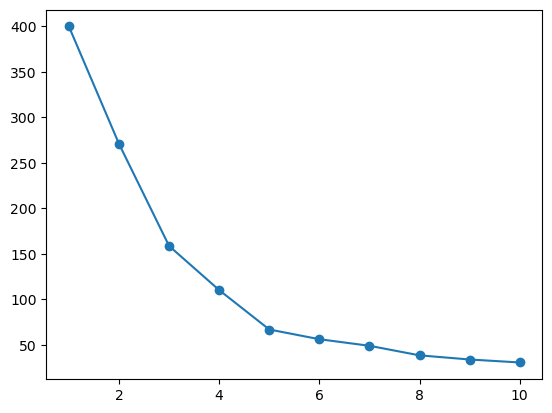

In [31]:
plt.plot(range(1,11),err,marker='o')
plt.show()

### Silhouette Score

silhouette score can be calculated with minimum of 2 clusters

sil. score has a measure of the range (-1,1)

In [41]:
from sklearn.metrics import silhouette_score

In [51]:
for i in range(2,9):
    km = KMeans(n_clusters = i,random_state = 100)
    km.fit(df_sc)
    sil_score=silhouette_score(df_sc,km.labels_)
    print('silhouette score for',i,'cluster is',sil_score)

silhouette score for 2 cluster is 0.2907934008243553
silhouette score for 3 cluster is 0.46552325533204225
silhouette score for 4 cluster is 0.4953283597895246
silhouette score for 5 cluster is 0.5520621436364275
silhouette score for 6 cluster is 0.5400545310397921
silhouette score for 7 cluster is 0.5284109639624426
silhouette score for 8 cluster is 0.45432141512061947


Inference - 

it seems that for 5 cluster the value is good

In [45]:
#!pip install yellowbrick

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

silhouette score for 2 cluster is 0.2907934008243553


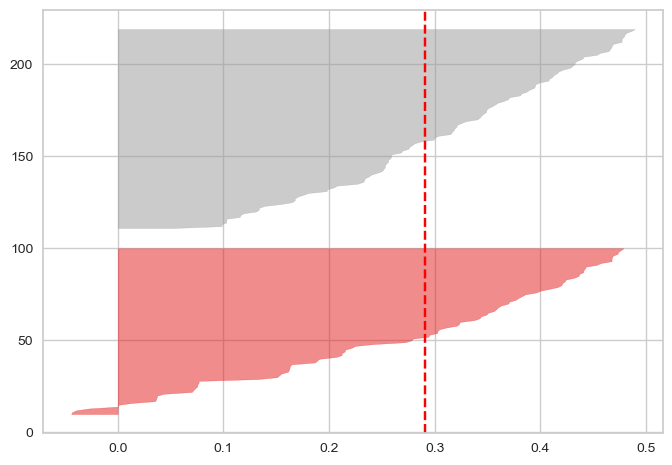

silhouette score for 3 cluster is 0.46552325533204225


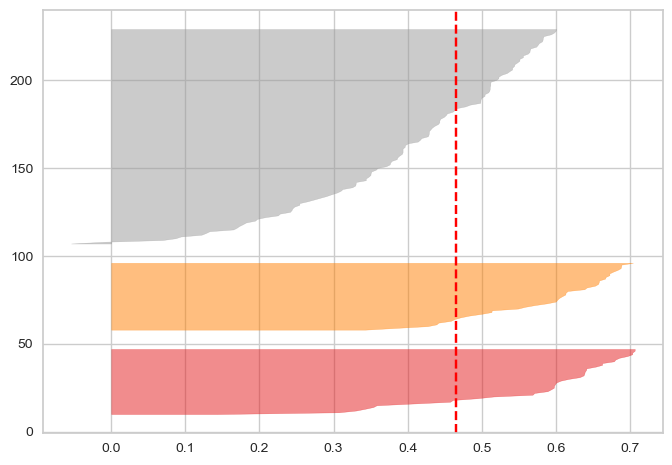

silhouette score for 4 cluster is 0.4953283597895246


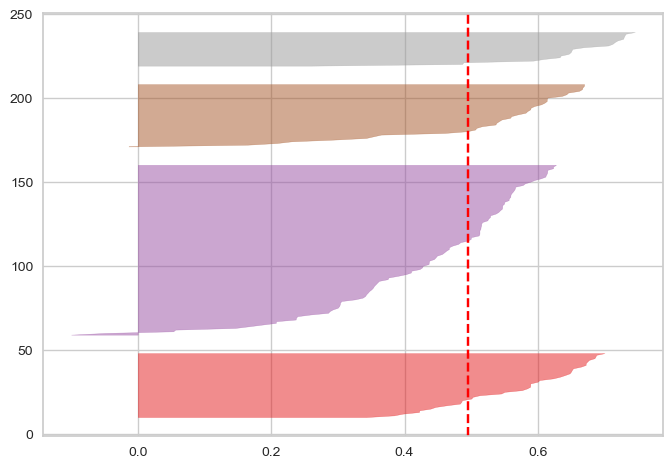

silhouette score for 5 cluster is 0.5520621436364275


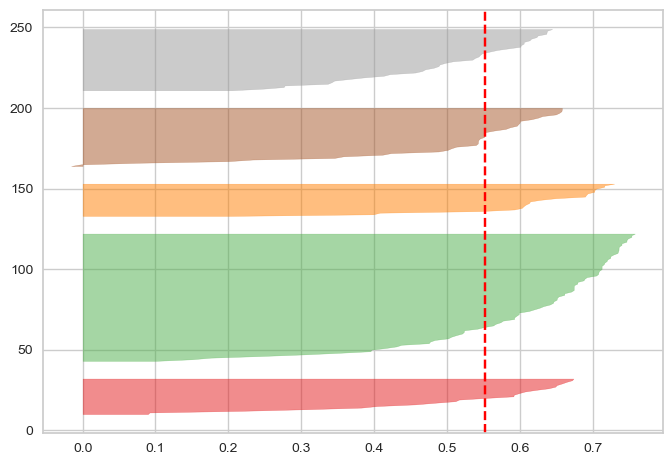

silhouette score for 6 cluster is 0.5400545310397921


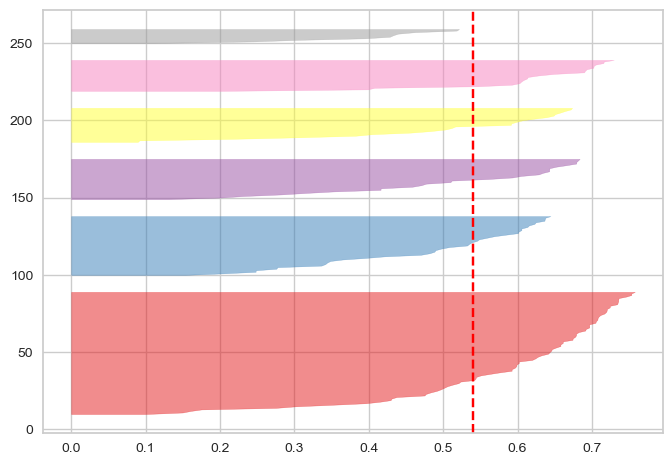

silhouette score for 7 cluster is 0.5284109639624426


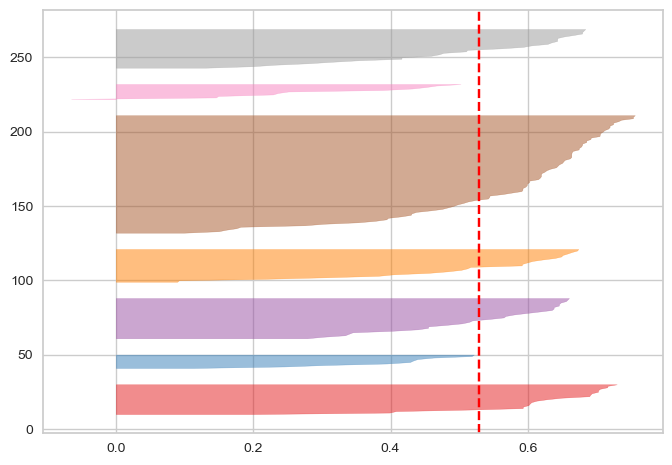

silhouette score for 8 cluster is 0.45432141512061947


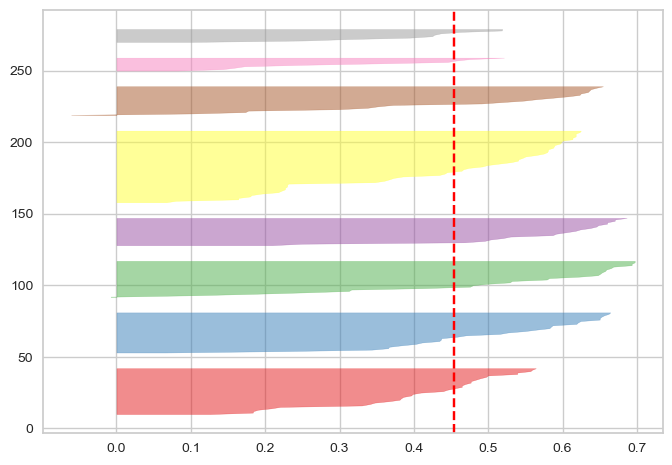

In [57]:
for i in range(2,9):
    km = KMeans(n_clusters = i,random_state = 100)
    km.fit(df_sc)
    sil_score=silhouette_score(df_sc,km.labels_)
    print('silhouette score for',i,'cluster is',sil_score)
    
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(df_sc)
    plt.show()

In [32]:
model_km = KMeans(n_clusters=5,random_state=100)
model_km.fit(df_sc)

KMeans(n_clusters=5, random_state=100)

In [33]:
model_km.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [34]:
df1['label'] = model_km.labels_
df1.head()

,Yearly_Income,Cust_Spend_Score,label
0,15000,44,0
1,15000,79,2
2,16000,8,0
3,16000,79,2
4,17000,41,0


In [35]:
model_km.cluster_centers_

array([[-1.30751869, -1.12631231],
       [-0.22414997, -0.00693126],
       [-1.35366972,  1.16441429],
       [ 1.02054738, -1.24685589],
       [ 0.99158305,  1.23437568]])

In [36]:
model_km.inertia_

66.69647392440946

--> intertia means errors

--> for good model inertia need to be low and cluster need to be high

In [4]:
import seaborn as sns

<Axes: xlabel='Yearly_Income', ylabel='Cust_Spend_Score'>

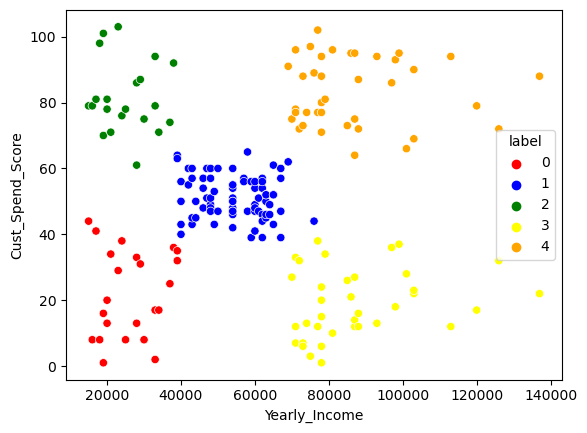

In [40]:
sns.scatterplot(x = df1['Yearly_Income'],y = df1['Cust_Spend_Score'],hue = df1['label'],palette = ['red','blue','green','yellow','orange'])

## Hirarchical Clustering

In [67]:
a = 0.40
b = 0.45
c = 0.53
d = 0.30

In [68]:
e = np.sqrt(((a-b)**2)+((c-d)**2))
print(e)

0.23537204591879643


In [69]:
dfh = pd.read_csv('grains.csv')

In [70]:
dfh.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [71]:
dfh.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [72]:
dfh1 = dfh.drop('target',axis = 1)

In [73]:
dfh1.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [74]:
df.shape

(200, 5)

In [78]:
dfh1.skew()

A         0.399889
P         0.386573
C        -0.537954
LK        0.525482
WK        0.134378
A_Coef    0.401667
LKG       0.561897
dtype: float64

In [79]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()
dfh_sc = sc.fit_transform(dfh1)
dfh1_sc = pd.DataFrame(dfh_sc,columns=dfh1.columns)

In [86]:
dfh1_sc.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


### Building the Kmeans model 

In [87]:
from sklearn.cluster import KMeans

In [92]:
err=[]
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(dfh_sc)
    err.append(km.inertia_)

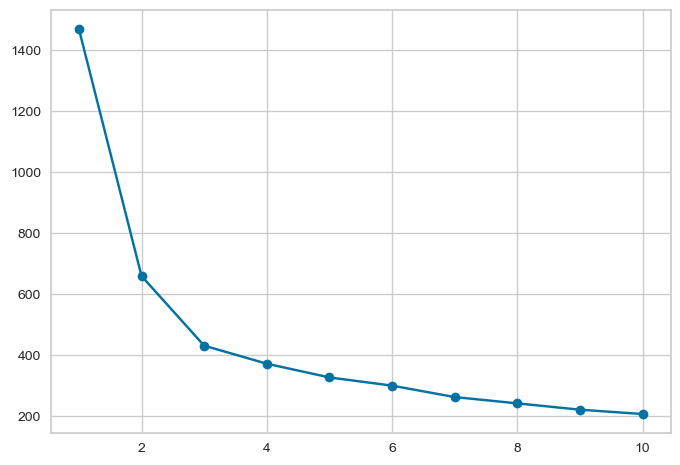

In [93]:
plt.plot(range(1,11),err,marker='o')
plt.show()

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
for i in range(2,9):
    kmh = KMeans(n_clusters = i,random_state = 100)
    kmh.fit(dfh_sc)
    sil_score=silhouette_score(dfh_sc,kmh.labels_)
    print('silhouette score for',i,'cluster is',sil_score)

silhouette score for 2 cluster is 0.46577247686580914
silhouette score for 3 cluster is 0.40072705527512986
silhouette score for 4 cluster is 0.32757426605518075
silhouette score for 5 cluster is 0.2790792425136618
silhouette score for 6 cluster is 0.27345405546235535
silhouette score for 7 cluster is 0.28579177753471113
silhouette score for 8 cluster is 0.2600010620432952


In [94]:
kmh.labels_

array([6, 6, 4, 4, 6, 4, 4, 4, 0, 6, 0, 6, 4, 4, 4, 4, 4, 6, 4, 7, 6, 6,
       6, 7, 6, 6, 7, 7, 4, 7, 6, 6, 6, 6, 6, 6, 0, 0, 6, 5, 4, 4, 4, 0,
       4, 6, 6, 6, 6, 6, 4, 0, 0, 4, 6, 6, 4, 6, 6, 7, 7, 7, 4, 7, 7, 4,
       6, 6, 6, 7, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 3, 2, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 0, 3, 4, 3, 2, 3, 3, 0, 3, 3,
       0, 0, 0, 4, 0, 0, 0, 0, 5, 5, 5, 5, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1,
       1, 1, 7, 1, 1, 1, 7, 7, 1, 7, 5, 7, 1, 7, 1, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 7, 5, 5, 5, 5, 5, 1, 1, 1, 5, 5, 1, 7, 7, 1, 7, 5, 5, 4,
       7, 4, 5, 4, 7, 5, 7, 7, 7, 5, 7, 5], dtype=int32)

In [95]:
model_kmh = KMeans(n_clusters=3,random_state=100)
model_kmh.fit(dfh_sc)

KMeans(n_clusters=3, random_state=100)

In [96]:
model_kmh.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [97]:
df_k = dfh1.copy()

In [98]:
df_k['labels'] = model_kmh.labels_
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [99]:
dfh['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [100]:
df_k['labels'].value_counts()

1    72
2    71
0    67
Name: labels, dtype: int64

The above values does not need to match we are just comparing to know how they are clustered we need the domain knowledge to figure out

### Building Hirarchical Clustering

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [104]:
from scipy.spatial.distance import pdist

### Finding cophenet coefficient

In [148]:
z = linkage(dfh1_sc,method = 'single')
c,c_dist = cophenet(z,pdist(dfh1_sc))
print(c)

0.4266838473609089


In [149]:
z = linkage(dfh1_sc,method = 'complete')
c,c_dist = cophenet(z,pdist(dfh1_sc))
print(c)

0.7129628799252149


In [150]:
z = linkage(dfh1_sc,method = 'centroid')
c,c_dist = cophenet(z,pdist(dfh1_sc))
print(c)

0.7374128094649327


In [151]:
z = linkage(dfh1_sc,method = 'ward')
c,c_dist = cophenet(z,pdist(dfh1_sc))
print(c)

0.7285528540866004


In [152]:
z = linkage(dfh1_sc,method = 'average')
c,c_dist = cophenet(z,pdist(dfh1_sc))
print(c)

0.7146889209200192


## Finding dendrogram

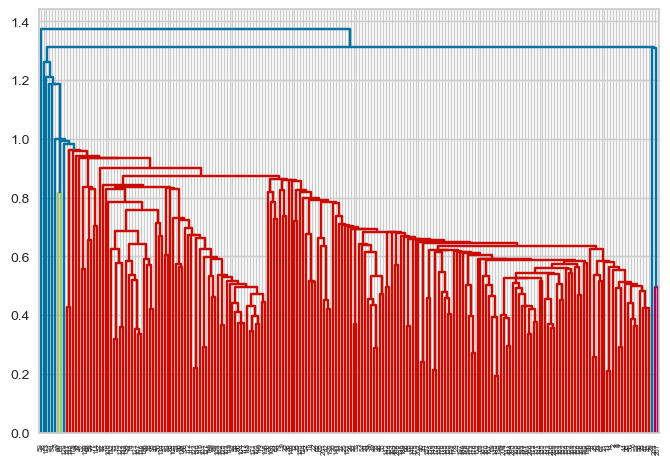

In [105]:
z = linkage(dfh1_sc,method = 'single')
dendrogram(z)
plt.show()

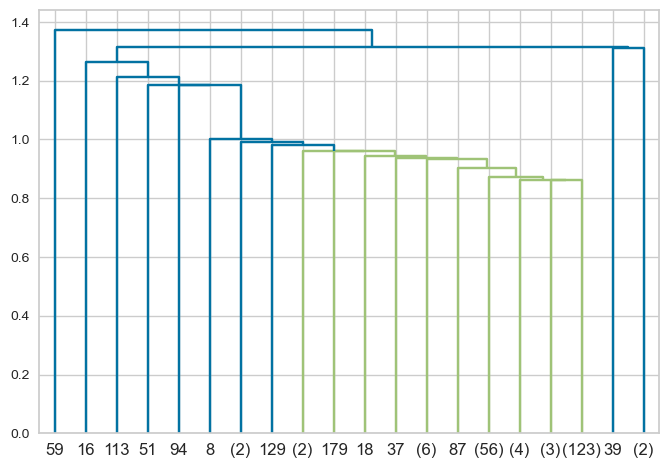

In [106]:
dendrogram(z,truncate_mode = 'lastp',p=20)
plt.show()

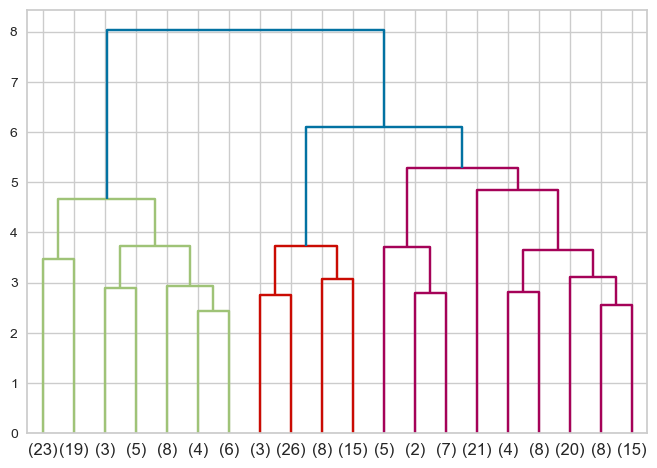

In [109]:
z = linkage(dfh1_sc,method = 'complete')
dendrogram(z,truncate_mode = 'lastp',p=20)
plt.show()

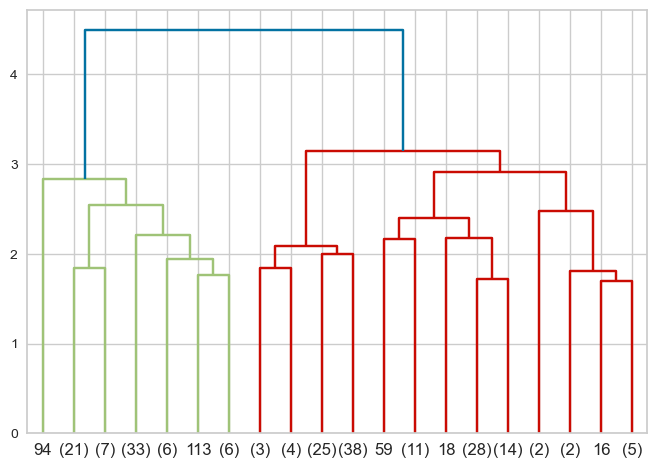

In [110]:
z = linkage(dfh1_sc,method = 'average')
dendrogram(z,truncate_mode = 'lastp',p=20)
plt.show()

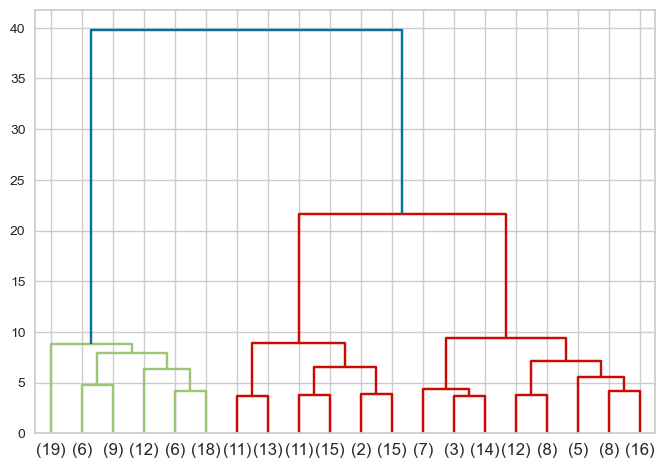

In [111]:
z = linkage(dfh1_sc,method = 'ward')
dendrogram(z,truncate_mode = 'lastp',p=20)
plt.show()

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
agc = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')
agc.fit(dfh1_sc)

AgglomerativeClustering(n_clusters=3)

In [114]:
agc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
df_h = dfh1.copy()
df_h['labels'] = agc.labels_
df_h.head()

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


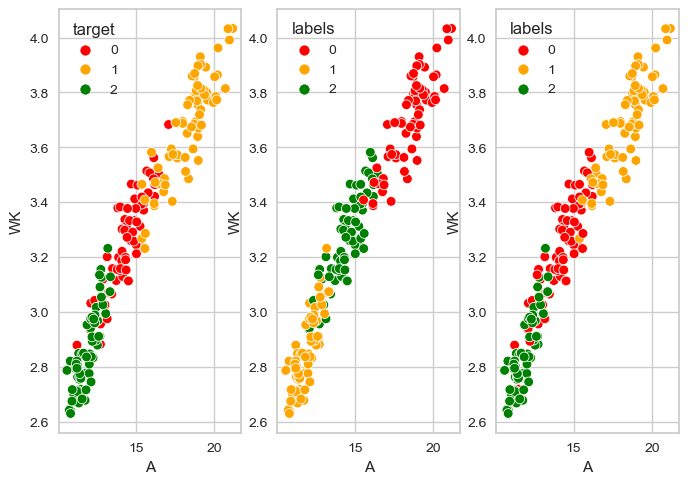

In [129]:
plt.subplot(1,3,1)
sns.scatterplot(data = dfh,x='A',y='WK',hue='target',palette=['red','orange',"green"])
plt.subplot(1,3,2)
sns.scatterplot(data = df_k,x='A',y='WK',hue='labels',palette=['red','orange',"green"])
plt.subplot(1,3,3)
sns.scatterplot(data = df_h,x='A',y='WK',hue='labels',palette=['red','orange',"green"])
plt.show()

### Decision tree classifier

In [130]:
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [132]:
x = df_k.drop('labels',1)
y = df_k['labels']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt = DecisionTreeClassifier(random_state=1)
model_dt = dt.fit(xtrain,ytrain)
ytest_pred = dt.predict(xtest)
model_dt.score(xtrain,ytrain)

1.0

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
print(accuracy_score(ytest,ytest_pred))

0.9047619047619048


## DBSCAN

In [154]:
data = pd.read_csv('db_data.csv')

In [155]:
data.head()

,F1,F2,out
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,0
3,-0.774415,0.649314,0
4,-0.379833,0.952658,0


In [156]:
data.shape

(500, 3)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      500 non-null    float64
 1   F2      500 non-null    float64
 2   out     500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [158]:
data.isnull().sum()

F1     0
F2     0
out    0
dtype: int64

In [159]:
### Building Kmeans with the above data

In [160]:
db = data.drop(['out'],axis = 1)

In [161]:
db

,F1,F2
0,1.047751,0.071995
1,0.020275,0.161049
2,-0.671793,0.750891
3,-0.774415,0.649314
4,-0.379833,0.952658
...,...,...
495,1.974937,0.188991
496,0.279537,-0.201197
497,1.918825,0.131525
498,0.068505,0.312760


In [162]:
model_db = KMeans(n_clusters=2,random_state=100)
model_db.fit(db)

KMeans(n_clusters=2, random_state=100)

In [163]:
model_db.labels_

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [166]:
db['label'] = pd.DataFrame(model_db.labels_)

In [167]:
db

,F1,F2,label
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,1
3,-0.774415,0.649314,1
4,-0.379833,0.952658,1
...,...,...,...
495,1.974937,0.188991,0
496,0.279537,-0.201197,0
497,1.918825,0.131525,0
498,0.068505,0.312760,1


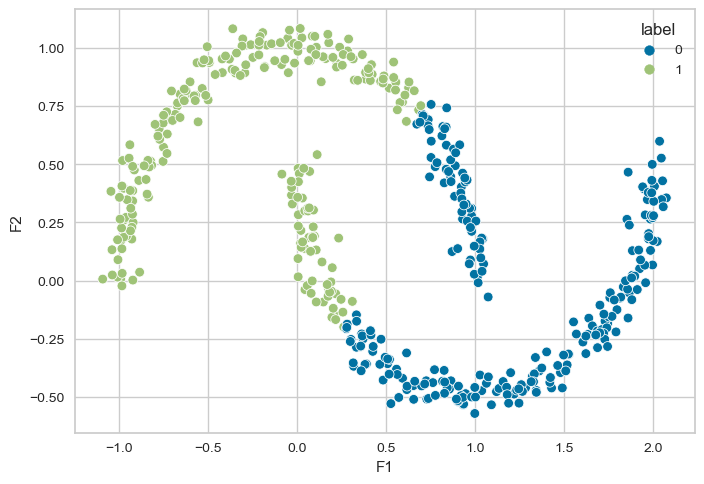

In [280]:
sns.scatterplot(x=db['F1'],y=db['F2'],hue = db['label'])
plt.show()

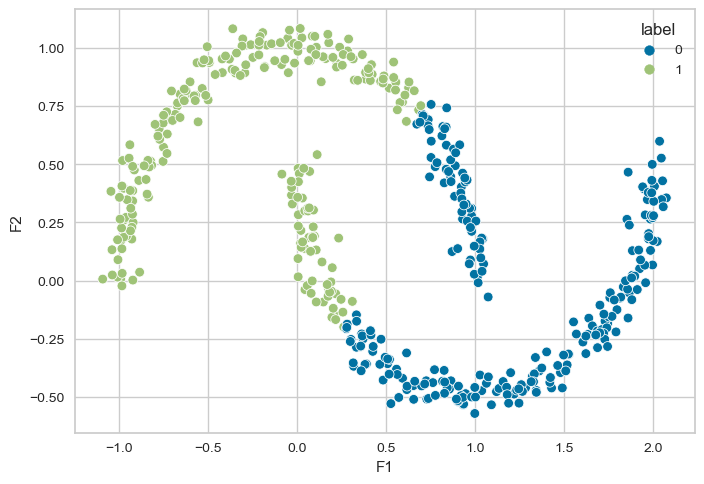

In [181]:
sns.scatterplot(x = db['F1'],y = db['F2'],hue = db['label'])
plt.show()

In [182]:
from sklearn.cluster import DBSCAN

In [183]:
ds = DBSCAN(eps = 0.2,min_samples=5)
ds.fit(db.iloc[:,0:2])
db['label_db']=ds.labels_

In [184]:
db.head()

,F1,F2,label,label_db
0,1.047751,0.071995,0,0
1,0.020275,0.161049,1,1
2,-0.671793,0.750891,1,0
3,-0.774415,0.649314,1,0
4,-0.379833,0.952658,1,0


In [185]:
db['label_db'].unique()

array([0, 1])

In [186]:
ds = DBSCAN(eps = 0.1,min_samples=5)
ds.fit(db.iloc[:,0:2])
db['label_db1']=ds.labels_

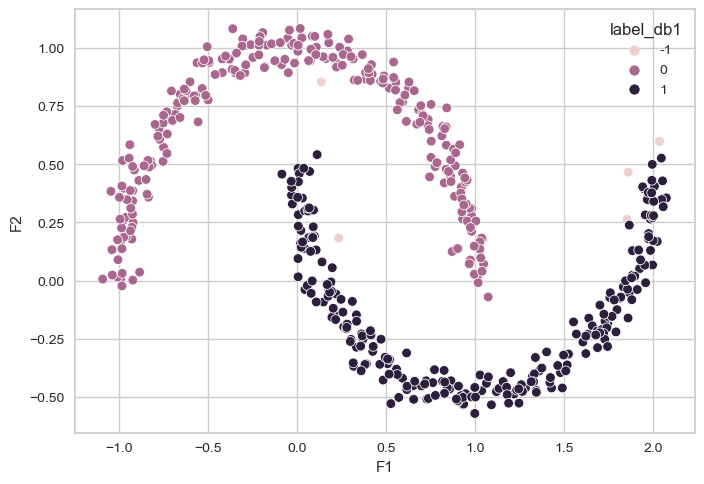

In [187]:
sns.scatterplot(x = db['F1'],y = db['F2'],hue = db['label_db1'])
plt.show()

In [188]:
db['label_db1'].unique()

array([ 0,  1, -1])

### Dimensional Reduction - PCA

In [205]:
a = np.array([[1,12],[13,4],[5,6]])
a

array([[ 1, 12],
       [13,  4],
       [ 5,  6]])

In [206]:
n = np.mean(a,0)
n

array([6.33333333, 7.33333333])

In [207]:
scaled = a-n

In [208]:
scaled

array([[-5.33333333,  4.66666667],
       [ 6.66666667, -3.33333333],
       [-1.33333333, -1.33333333]])

### Finding Co-variance

In [209]:
c = np.cov(scaled.T)
c

array([[ 37.33333333, -22.66666667],
       [-22.66666667,  17.33333333]])

### Finding Eigen values and Eigen vectors

In [210]:
eigval,eigvect = np.linalg.eig(c)

## Finding PCA - Principal Component Analysis

In [211]:
pc = scaled.dot(eigvect)
pc

array([[-7.01625726,  0.99717413],
       [ 7.4051753 ,  0.84789994],
       [-0.38891804, -1.84507407]])

### Implementing the above in a dataset

In [1]:
from sklearn import datasets

In [5]:
iris = sns.load_dataset('iris')

In [6]:
x = iris.drop('species',1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [13]:
n = np.mean(x_sc,0)
n

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [14]:
scaled = x_sc-n

In [15]:
c=np.cov(x_sc.T)
c

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [16]:
np.linalg.eig(c)

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [17]:
eigval,eigvect = np.linalg.eig(c)

### Find Cummulative Sum

In [18]:
var_exp = eigval/sum(eigval)*100
var_exp

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [19]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

### Screen plot

In [22]:
import matplotlib.pyplot as plt

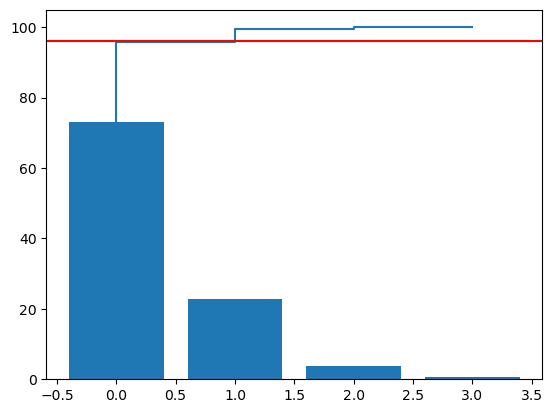

In [23]:
plt.bar(range(4),var_exp)
plt.step(range(4),cum_var_exp)
plt.axhline(96,c = 'red')
plt.show()

In [24]:
pc = scaled.dot(eigvect)
pc

array([[-2.26470281e+00, -4.80026597e-01, -1.27706022e-01,
         2.41682039e-02],
       [-2.08096115e+00,  6.74133557e-01, -2.34608854e-01,
         1.03006775e-01],
       [-2.36422905e+00,  3.41908024e-01,  4.42014848e-02,
         2.83770534e-02],
       [-2.29938422e+00,  5.97394508e-01,  9.12901063e-02,
        -6.59555596e-02],
       [-2.38984217e+00, -6.46835383e-01,  1.57381957e-02,
        -3.59228133e-02],
       [-2.07563095e+00, -1.48917752e+00,  2.69682944e-02,
         6.60818022e-03],
       [-2.44402884e+00, -4.76441976e-02,  3.35470401e-01,
        -3.67755572e-02],
       [-2.23284716e+00, -2.23148073e-01, -8.86954979e-02,
        -2.46120962e-02],
       [-2.33464048e+00,  1.11532768e+00,  1.45076864e-01,
        -2.68592208e-02],
       [-2.18432817e+00,  4.69013561e-01, -2.53765567e-01,
        -3.98992877e-02],
       [-2.16631010e+00, -1.04369065e+00, -2.68681102e-01,
         1.67313672e-02],
       [-2.32613087e+00, -1.33078335e-01,  9.37592444e-02,
      

In [25]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)
pca2 = pca.fit_transform(x_sc)
pca_df = pd.DataFrame(pca2)
pca_df

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [32]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## Finding LDA - Linear Discriminent Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [34]:
y = iris['species']

In [35]:
lda = LDA()
lda_model = lda.fit(x_sc,y)

In [36]:
lda_model.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [268]:
lda1= LDA(n_components=1)
lda_model = lda1.fit(x_sc,y)

In [269]:
lda_model.explained_variance_ratio_

array([0.9912126])

In [270]:
lda_model

LinearDiscriminantAnalysis(n_components=1)

In [275]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size = 0.2,random_state=13)

In [276]:
mylda = LDA(n_components=1)
model_mylda = mylda.fit(xtrain,ytrain)
ypred_test = mylda.predict(xtest)

In [277]:
from sklearn.metrics import accuracy_score

In [278]:
print('accuracy_score',accuracy_score(ypred_test,ytest))

accuracy_score 0.9666666666666667
